# Lag Indicator Between Same Sector Lead-Lag Equities

### Introduction

This notebook aims to identify and analyze the lag between sector leader equities' prices and those of less dominant (lag) equities within the same sector. Formally, the notebook aims to answer the following: 

For sector $M$, a dominant equity $L \in M$, and a non-dominant equity $F \in M$, **is the price $P_L(t_i)$ a significant prediction parameter of $P_F(t_{i+1})$?**

During the process, the notebook will also try to explore:

* Choosing $L, F \in M$
* Does $\rho(P_L, P_F)$ dictate whether using this predictor makes any sense?
* $\rho(P_L(t), P_F(t+1))$ vs $\rho(P_L(t), P_F(t))$

*All code will utilize helper classes and methods that come from modules equity.py, algebra.py, sector.py.*

### Overview and Motivation

To get an idea for the motivation of this analysis, we will fetch and plot scaled prices for two equities within the U.S. Energy sector. One of these will be a clear sector leader, $\text{CVX}$, and a less dominant equity of the sector, $\text{BKR}$. Currently, we choose these based on a natural intuition of what it means to be a dominant and non-dominant equity:

* **Dominant/Leader Equity:** Equity with a high market cap compared to the sector's other equities
* **Non-dominant/Follower Equity:** Equity with a medium-low market cap compared to others of the sector

We fetch the by-minute closing prices for 2025-11-17 for the two equities...

                            CVX price  BKR price
Datetime                                        
2025-11-17 09:30:00-05:00  157.089996  48.549999
2025-11-17 09:31:00-05:00  156.979996  48.669998
2025-11-17 09:32:00-05:00  156.860001  48.980000
2025-11-17 09:33:00-05:00  156.565002  48.919998
2025-11-17 09:34:00-05:00  156.627899  48.799999
...                               ...        ...
2025-11-17 15:55:00-05:00  154.869995  47.985001
2025-11-17 15:56:00-05:00  154.880005  47.970001
2025-11-17 15:57:00-05:00  154.830002  47.915001
2025-11-17 15:58:00-05:00  154.918503  47.935001
2025-11-17 15:59:00-05:00  154.820007  47.910000

[390 rows x 2 columns]


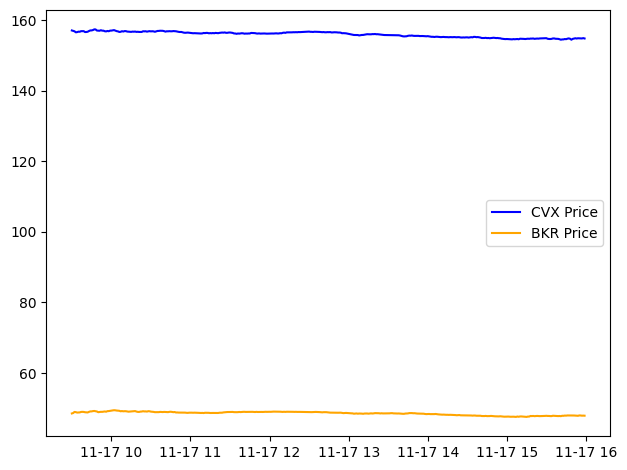

In [2]:
from equity import Equity
import matplotlib.pyplot as plt
import pandas as pd

CVX_prices = Equity(tick='CVX').prices(start='2025-11-17', end='2025-11-18', interval='1m')
BKR_prices = Equity(tick='BKR').prices(start='2025-11-17', end='2025-11-18', interval='1m')
df = pd.concat([CVX_prices.rename("CVX price"), BKR_prices.rename("BKR price")], axis=1)
print(df)

plt.plot(df['CVX price'], color='blue', label='CVX Price')
plt.plot(df['BKR price'], color='orange', label='BKR Price')
plt.legend()
plt.tight_layout()
plt.show()

Evidently, it is hard to get any type of idea from the above plot. Instead, we will use scaled prices (scaled to $p=100$) to compare prices of two or more equities during the same period.

                            CVX price  BKR price  CVX scaled  BKR scaled
Datetime                                                                
2025-11-17 09:30:00-05:00  157.089996  48.549999  100.000000  100.000000
2025-11-17 09:31:00-05:00  156.979996  48.669998   99.929976  100.247166
2025-11-17 09:32:00-05:00  156.860001  48.980000   99.853590  100.885686
2025-11-17 09:33:00-05:00  156.565002  48.919998   99.665801  100.762099
2025-11-17 09:34:00-05:00  156.627899  48.799999   99.705839  100.514933
...                               ...        ...         ...         ...
2025-11-17 15:55:00-05:00  154.869995  47.985001   98.586797   98.836254
2025-11-17 15:56:00-05:00  154.880005  47.970001   98.593169   98.805359
2025-11-17 15:57:00-05:00  154.830002  47.915001   98.561338   98.692073
2025-11-17 15:58:00-05:00  154.918503  47.935001   98.617675   98.733269
2025-11-17 15:59:00-05:00  154.820007  47.910000   98.554975   98.681773

[390 rows x 4 columns]


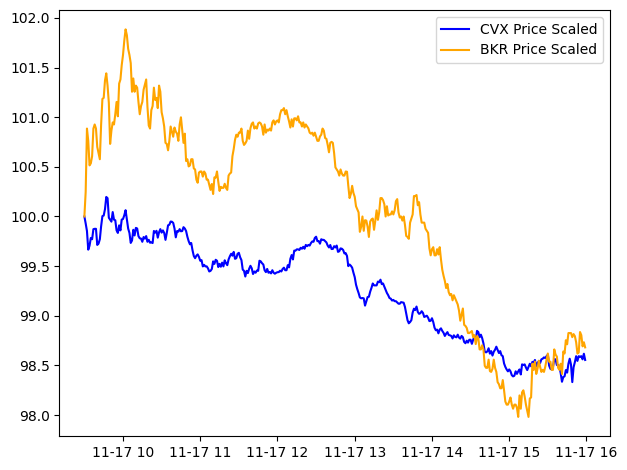

In [5]:
from algebra import scale

df['CVX scaled'] = scale(df['CVX price'], initial=100)
df['BKR scaled'] = scale(df['BKR price'], initial=100)
print(df)

plt.plot(df['CVX scaled'], color='blue', label='CVX Price Scaled')
plt.plot(df['BKR scaled'], color='orange', label='BKR Price Scaled')
plt.legend()
plt.tight_layout()
plt.show()


With these scaled prices, we begin to see some sort of comovement between the two series. For a final motivation, let us measure the correlation coefficient between the scaled prices at time $t$ between the two scaled series.

Correlation Coeff. (CVX Scaled, BKR Scaled): 0.948425251385929


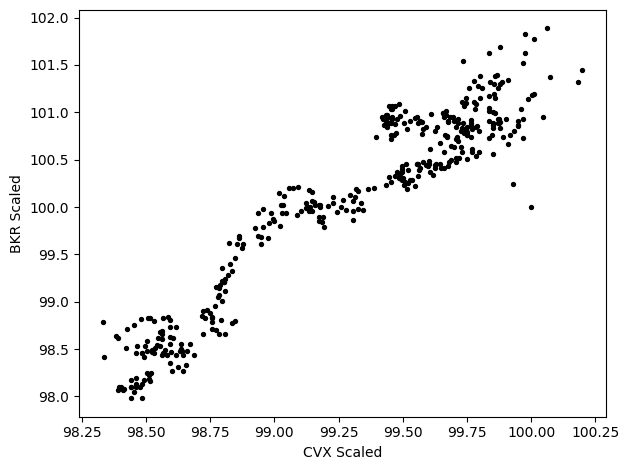

In [ ]:
import numpy as np

corr = np.corrcoef(df['CVX scaled'], df['BKR scaled'])[0][1]
print(f"Correlation Coeff. (CVX Scaled, BKR Scaled): {corr}")

plt.scatter(x=df['CVX scaled'], y=df['BKR scaled'], color='black', s=8)
plt.xlabel("CVX Scaled")
plt.ylabel("BKR Scaled")
plt.tight_layout()
plt.show()

For motivation, we will repeat this step but this time with $P_{CVX}(t)$ and $P_{BKR}(t+1)$.

                           CVX scaled (t)  BKR scaled (t+1)
Datetime                                                   
2025-11-17 09:30:00-05:00      100.000000        100.247166
2025-11-17 09:31:00-05:00       99.929976        100.885686
2025-11-17 09:32:00-05:00       99.853590        100.762099
2025-11-17 09:33:00-05:00       99.665801        100.514933
2025-11-17 09:34:00-05:00       99.705839        100.535535
...                                   ...               ...
2025-11-17 15:54:00-05:00       98.593169         98.836254
2025-11-17 15:55:00-05:00       98.586797         98.805359
2025-11-17 15:56:00-05:00       98.593169         98.692073
2025-11-17 15:57:00-05:00       98.561338         98.733269
2025-11-17 15:58:00-05:00       98.617675         98.681773

[389 rows x 2 columns]
Correlation Coeff. using P_CVX(t) and P_BKR(t+1): 0.94850404981315
Improvement in Correlation Coeff.: 0.00831%


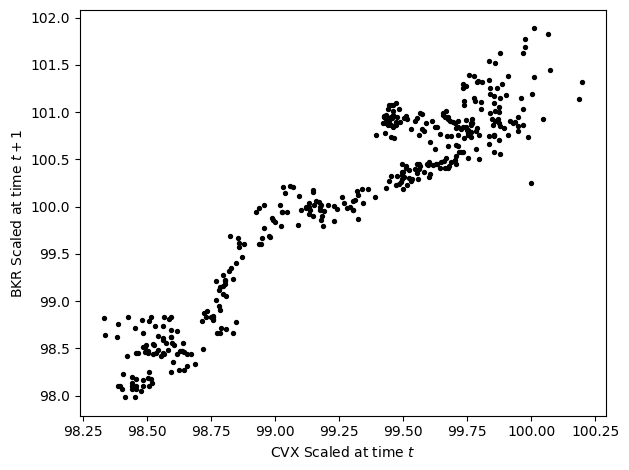

In [25]:
df_next = pd.DataFrame({
    "CVX scaled (t)": df["CVX scaled"],
    "BKR scaled (t+1)": df["BKR scaled"].shift(-1)
})
df_next = df_next.dropna()
print(df_next)

corr_next = np.corrcoef(df_next['CVX scaled (t)'], df_next['BKR scaled (t+1)'])[0][1]
print(f"Correlation Coeff. using P_CVX(t) and P_BKR(t+1): {corr_next}")

corr_improvement = ((corr_next-corr)/corr)*100
print(f"Improvement in Correlation Coeff.: {round(corr_improvement, 5)}%")

plt.scatter(x=df_next["CVX scaled (t)"], y=df_next["BKR scaled (t+1)"], color='black', s=8)
plt.xlabel(r"CVX Scaled at time $t$")
plt.ylabel(r"BKR Scaled at time $t+1$")
plt.tight_layout()
plt.show()


In this quick example, we see an improvement in our correlation coefficient when we change our secondary parameter from $P_{BKR}(t)$ to $P_{BKR}(t+1)$. Since:

$$
\rho(P_{CVX}(t), P_{BKR}(t+1)) > \rho(P_{CVX}(t), P_{BKR}(t)),
$$

we can infer that $P_{CVX}$ at time $t$ includes information about $P_{BKR}$ at time $t+1$.

To quickly showcase how this parameter change could affect predictive modeling, let us do an easy example using linear regression...